In [1]:
# knihovna matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# knihovna seaborn
import seaborn as sns


In [2]:
titanic_train = pd.read_csv('./train.csv', engine="python")
titanic_train = pd.concat([titanic_train, pd.get_dummies(titanic_train["Sex"]), 
                      pd.get_dummies(titanic_train["Embarked"])], axis=1)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False,True,True,False,False


In [3]:
# Zjistíme něco o datech
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# V datasetu chybí data, doplním chybějící věk za průměrný
titanic_train["Age"] = titanic_train["Age"].fillna(30) 

In [5]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = np.array(titanic_train[["Pclass", "male", "female", "Age", "SibSp", "Parch", "Fare", "S", "Q", "C"]]).reshape((-1, 10))
y = np.array(titanic_train["Survived"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tree.DecisionTreeClassifier(max_depth=4).fit(x_train, y_train)

y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)

0.2011173184357542

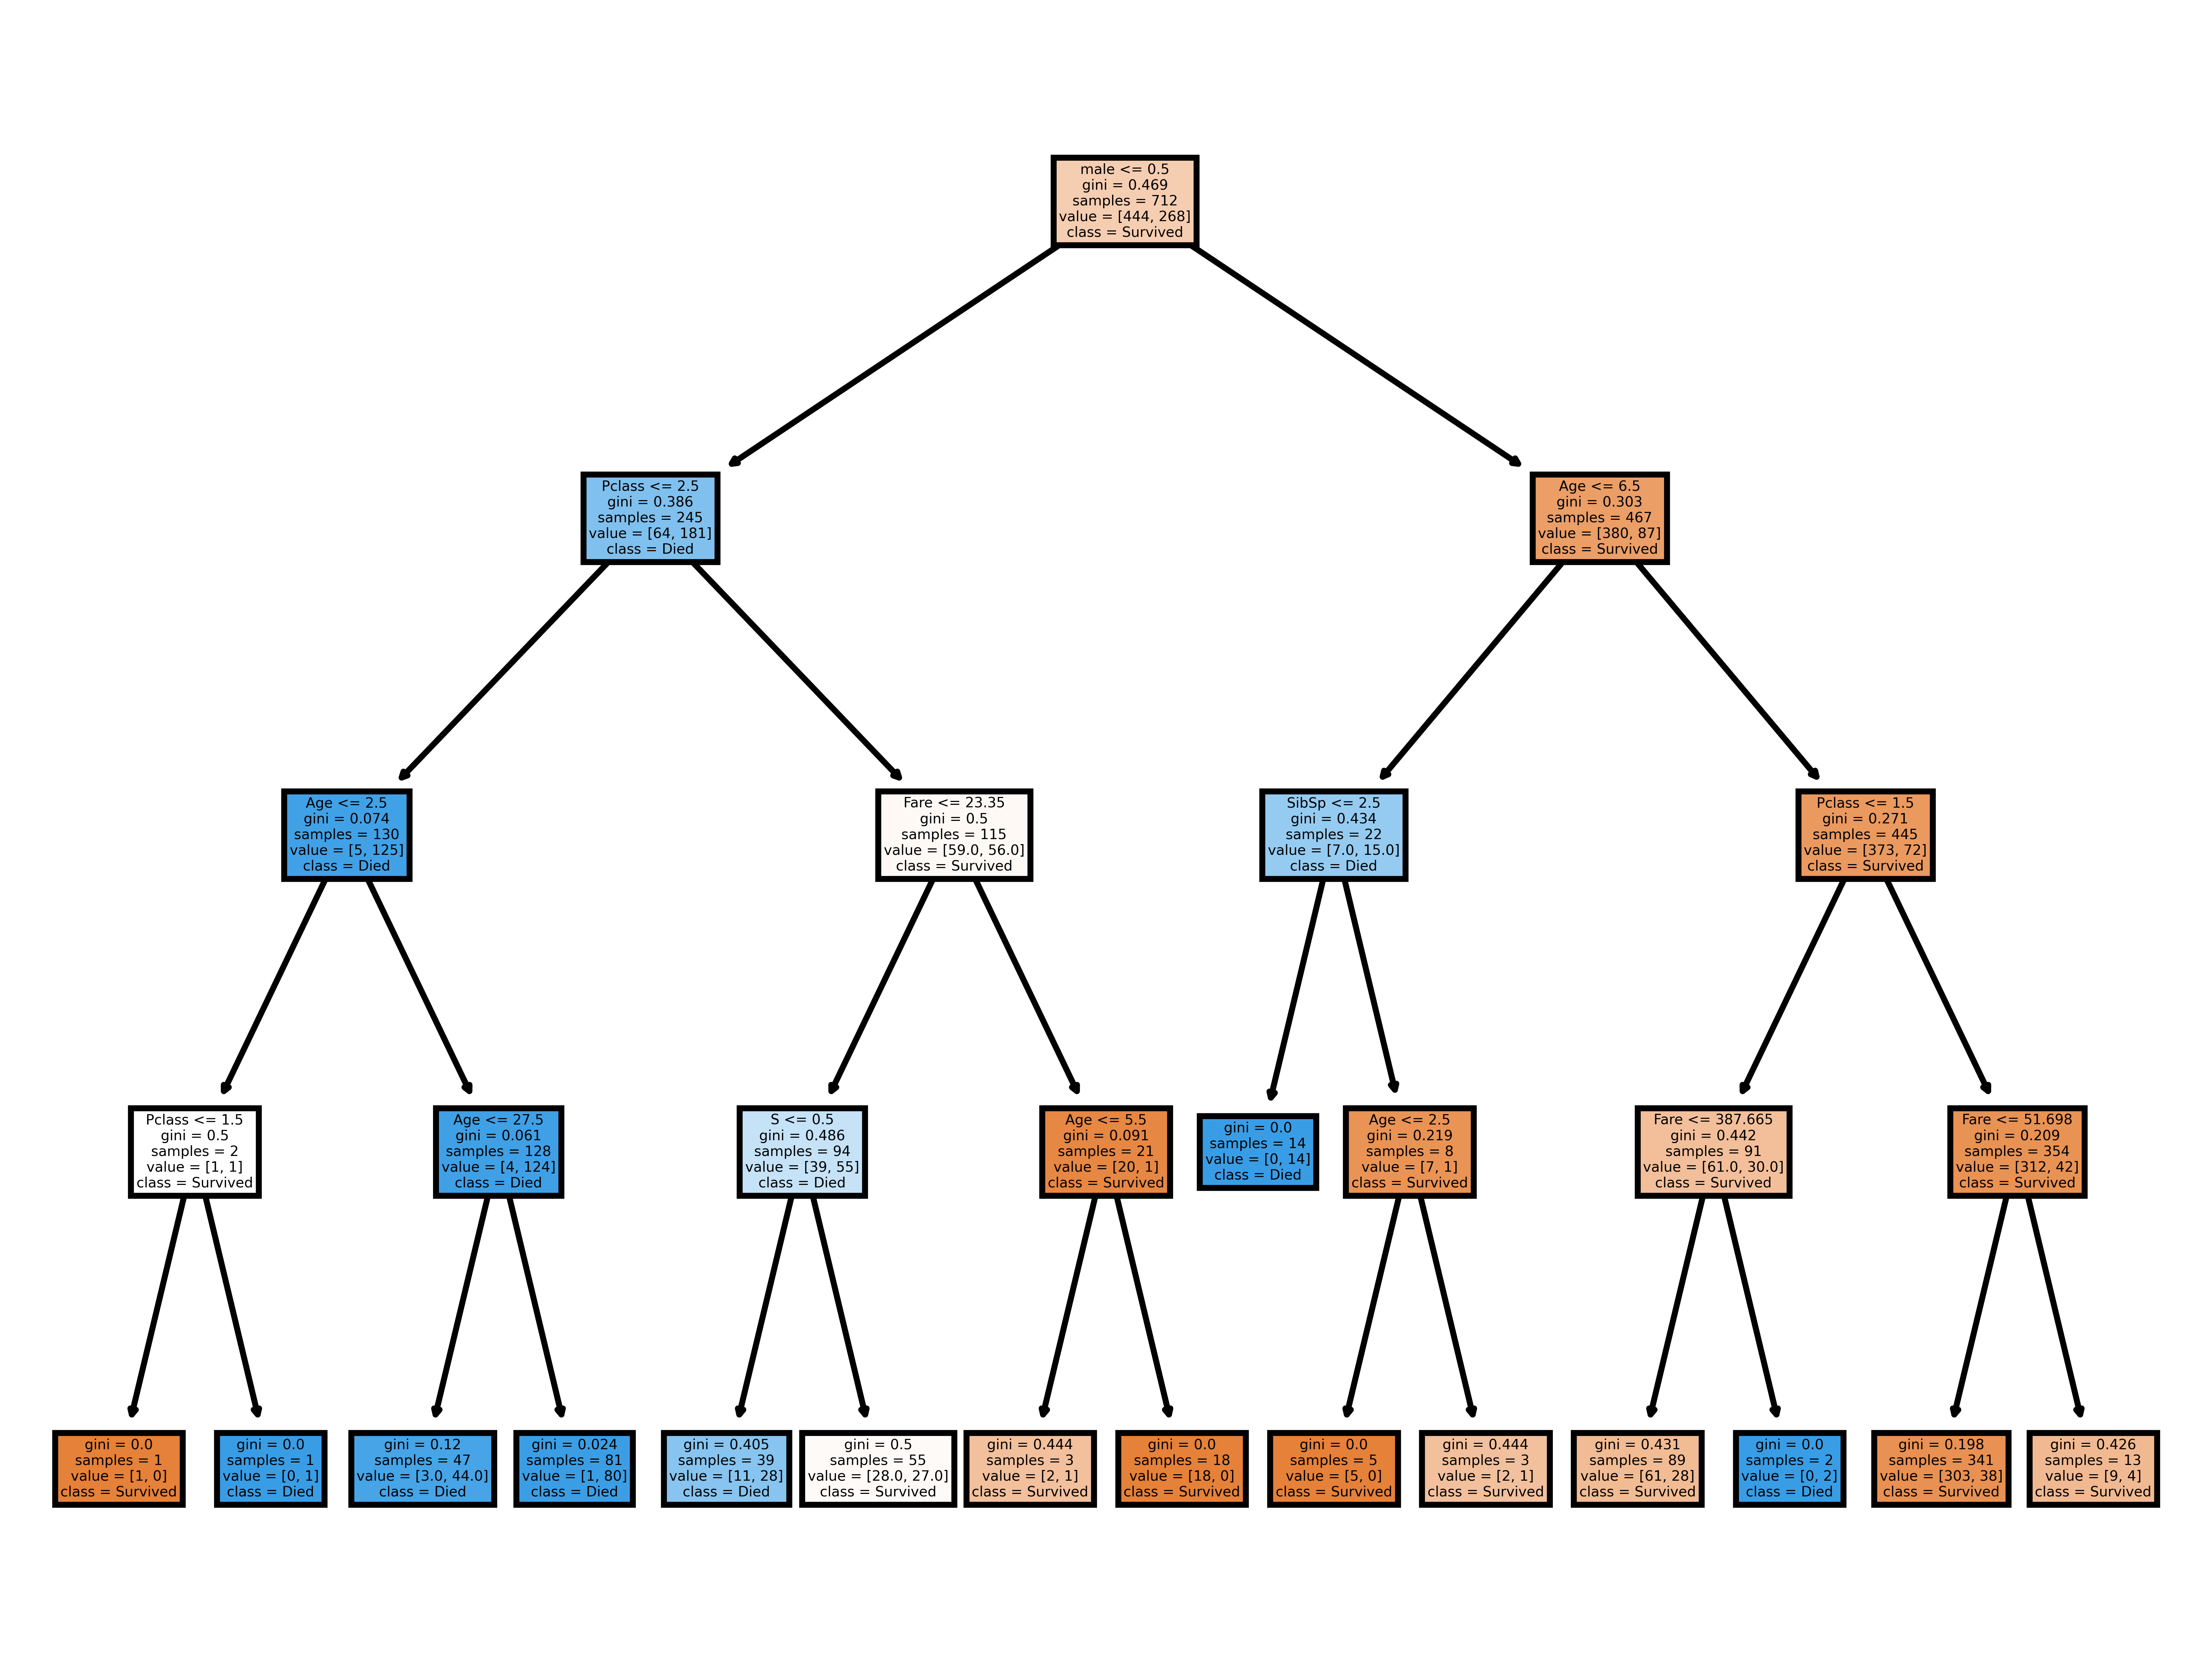

In [6]:
fig, axes = plt.subplots(dpi=1200)

tree.plot_tree(model,
               feature_names = ["Pclass", "male", "female", "Age", "SibSp", "Parch", "Fare", "S", "Q", "C"], 
               class_names=["Survived","Died"],
               filled = True)
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



<Axes: >

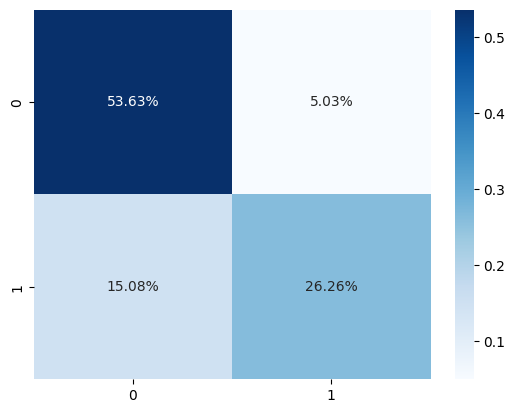

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

cf_matrix = confusion_matrix(y_test, model.predict(x_test))
print(classification_report(y_test, model.predict(x_test)))

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [33]:
# ID3 algoritmus
# Výpočet entropie

class ID3:

    # Výpočet entropie
    def calculate_entropy(self, df, column):
        total = df[column].shape[0]
        final_entropy = 0
        values = df[column].unique()
        
        for x in values:
            count = df[(df[column] == x)].shape[0]
            if count !=0:
                p = count/total
                final_entropy = final_entropy + p * np.log2(p)
            
        return -1 * final_entropy

    # Výpočet informace
    def calculate_information(self, df, feature, label):
        values = df[feature].unique()
        weighted_entropy = 0
    
        for x in values:
            subset = df[df[feature] == x]
            proportion = subset.shape[0] / df.shape[0]
            weighted_entropy += proportion * self.calculate_entropy(subset, label)
    
        information = self.calculate_entropy(df, label) - weighted_entropy
    
        return information

    # Vytvoření stromu
    def create_tree(self, df, columns, output):
        if (len(df[output].unique()) == 1):
            return df[output].iloc[0]
        
        if (len(columns) == 0):
            return df[output].mode().iloc[0] 

        max_information = float('-inf')
        
        for column in columns:
            temp = self.calculate_information(df, column, output)
            if (temp > max_information):
                max_information = temp
                max_info_col = column
    
        tree = []
        
        new_columns = columns.copy()
        new_columns.remove(max_info_col)
        
        tree.append(max_info_col + ": ")

        for value in df[max_info_col].unique():
            new_df = df[df[max_info_col] == value]
            tree.append([str(value) + "->" , self.create_tree(new_df, new_columns, output)])
            
        return tree

id3 = ID3()
titanic_train2 = titanic_train.loc[:,["male","S","Q","C","Survived"]]
id3.create_tree(titanic_train2, columns=["male","S","Q","C"], output="Survived")

['male: ',
 ['True->',
  ['C: ',
   ['False->',
    ['S: ',
     ['True->', ['Q: ', ['False->', 0]]],
     ['False->', ['Q: ', ['True->', 0]]]]],
   ['True->', ['S: ', ['False->', ['Q: ', ['False->', 0]]]]]]],
 ['False->',
  ['C: ',
   ['True->', ['S: ', ['False->', ['Q: ', ['False->', 1]]]]],
   ['False->',
    ['S: ',
     ['True->', ['Q: ', ['False->', 1]]],
     ['False->', ['Q: ', ['True->', 1], ['False->', 1]]]]]]]]